In [1]:
import pickle
import warnings

import matplotlib as mpl
import pandas as pd
from matplotlib import pyplot as plt

from utils.plots import bar_metrics


# We will use deprecated models of statmodels which throw a lot of warnings to use more modern ones
warnings.filterwarnings("ignore")
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['text.color'] = 'k'
mpl.rcParams['figure.figsize'] = 18, 8

with open('results/scores.pickle', 'rb') as handle:
    resultsDict = pickle.load(handle)

# Load our results from the model notebook
with open('results/predictions.pickle', 'rb') as handle:
    predictionsDict = pickle.load(handle)

# Results analysis and discussion

#  Results

## Evaluation Metrics

There are many measures that can be used to analyze the performance of our prediction so we will be using the top 4 most used metrics for time series forecasting. Each of this metrics are different from the others in the way the test our predictions so don't expect a model to perform best in all metrics. Choosing the right metric for your problem is also a big challenge, this will depend on your forecasting needs.

* [Mean Absolute Error (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error)
* [Mean Absolute Percentage Error (MAPE)](https://en.wikipedia.org/wiki/Mean_absolute_percentage_error)
* [Root Mean Squared Error (RMSE)](https://en.wikipedia.org/wiki/Root-mean-square_deviation)
* [R2 Coefficient of determination (r2)](https://en.wikipedia.org/wiki/Coefficient_of_determination)

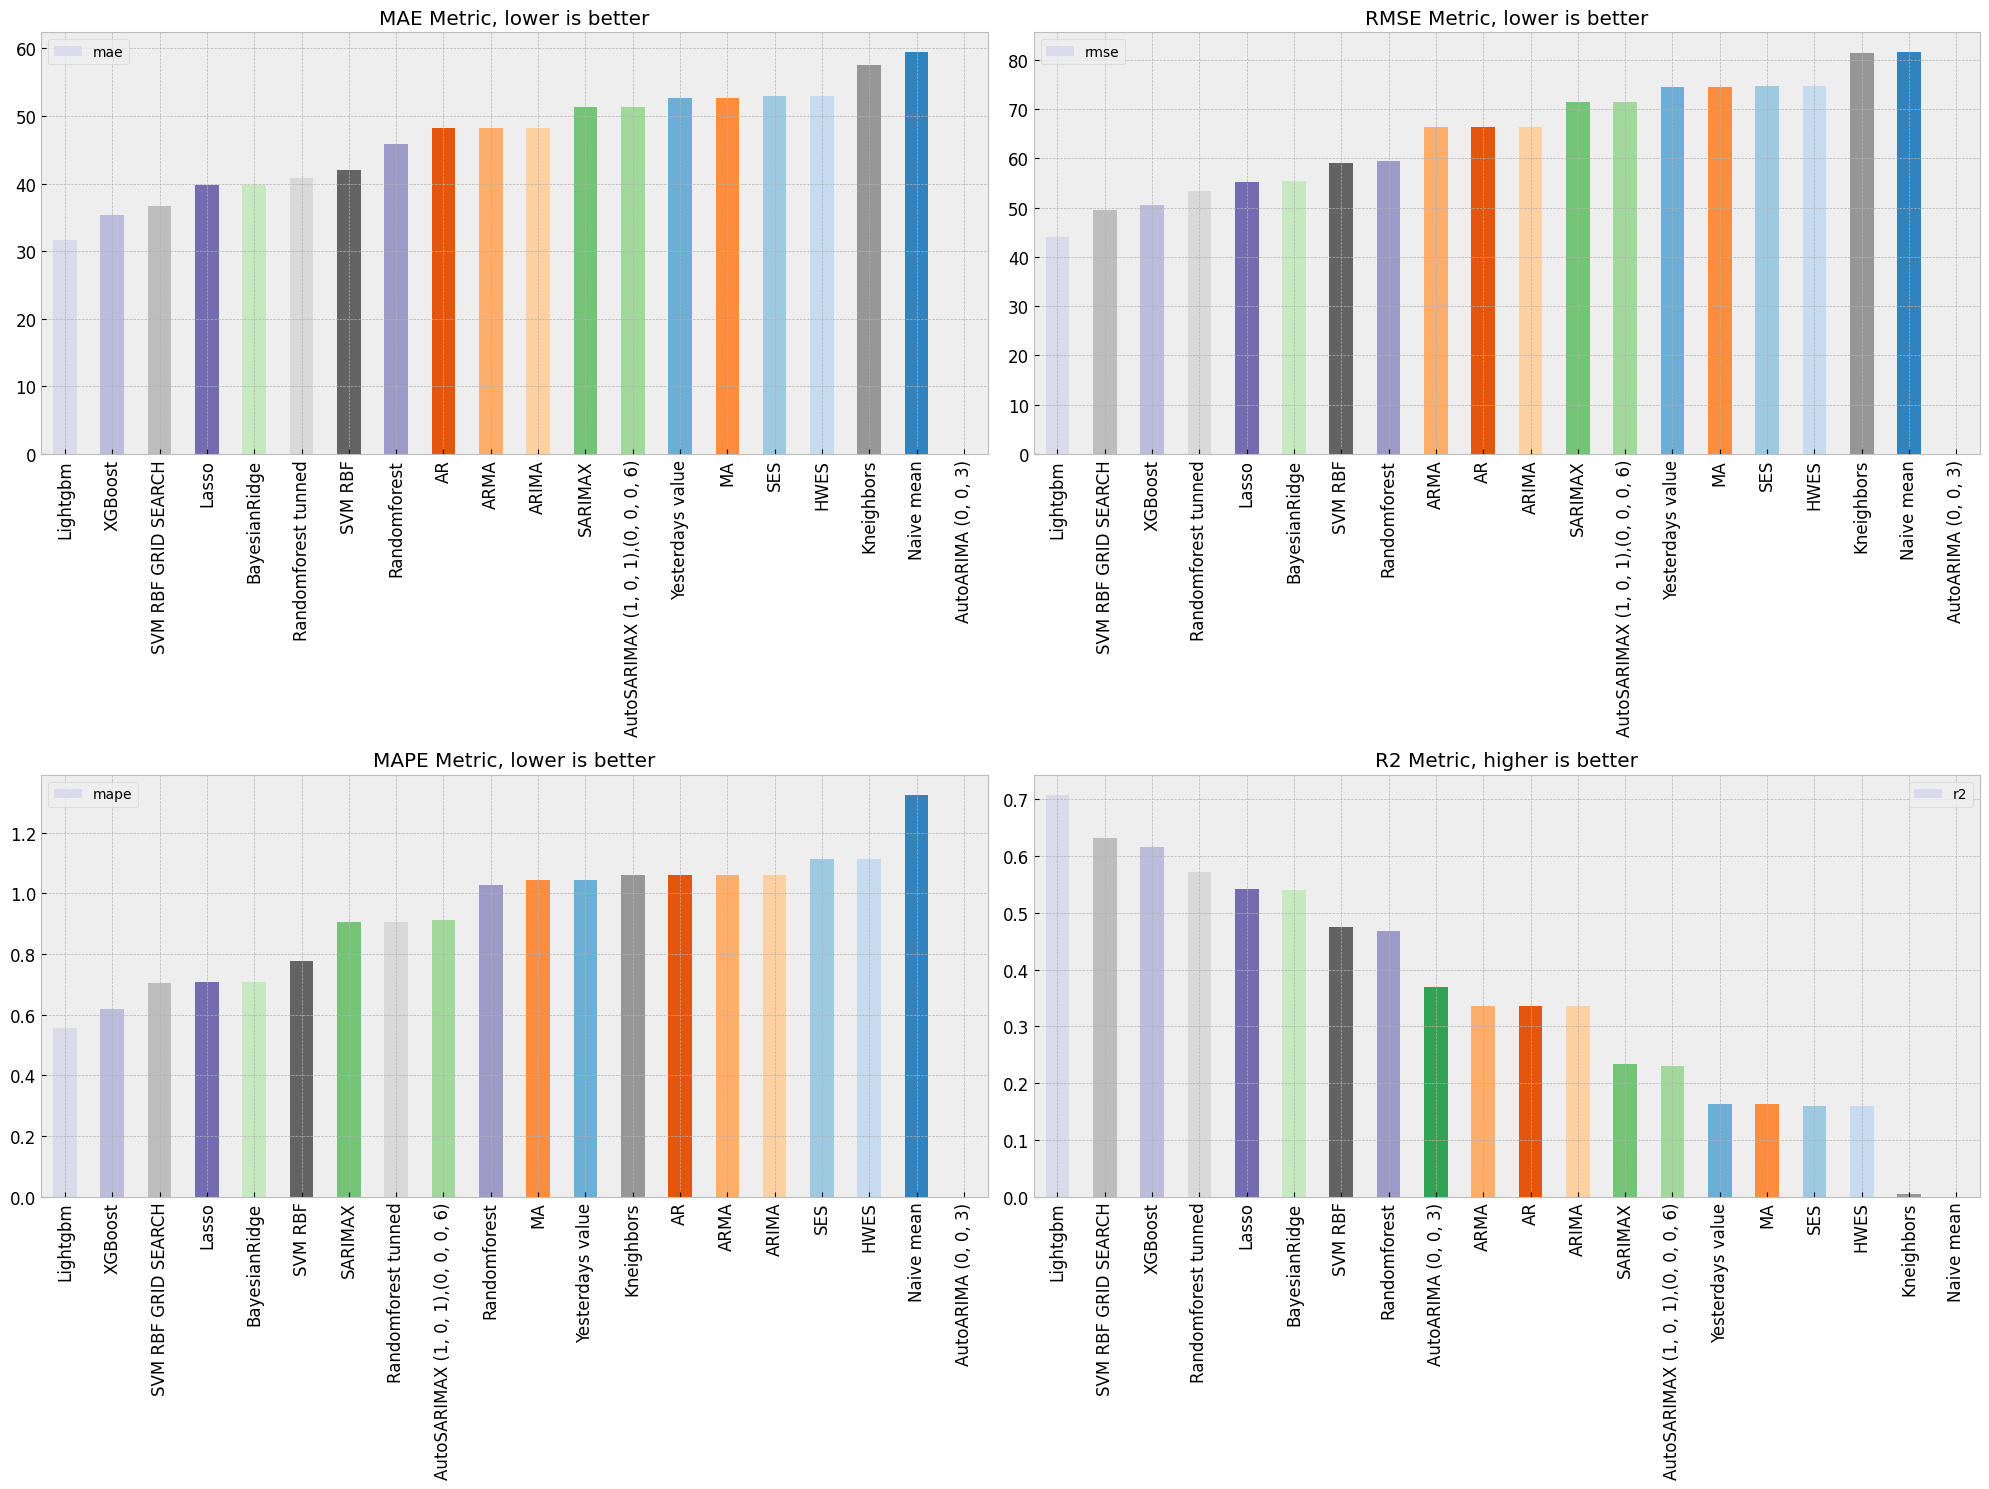

In [2]:
bar_metrics(resultsDict)

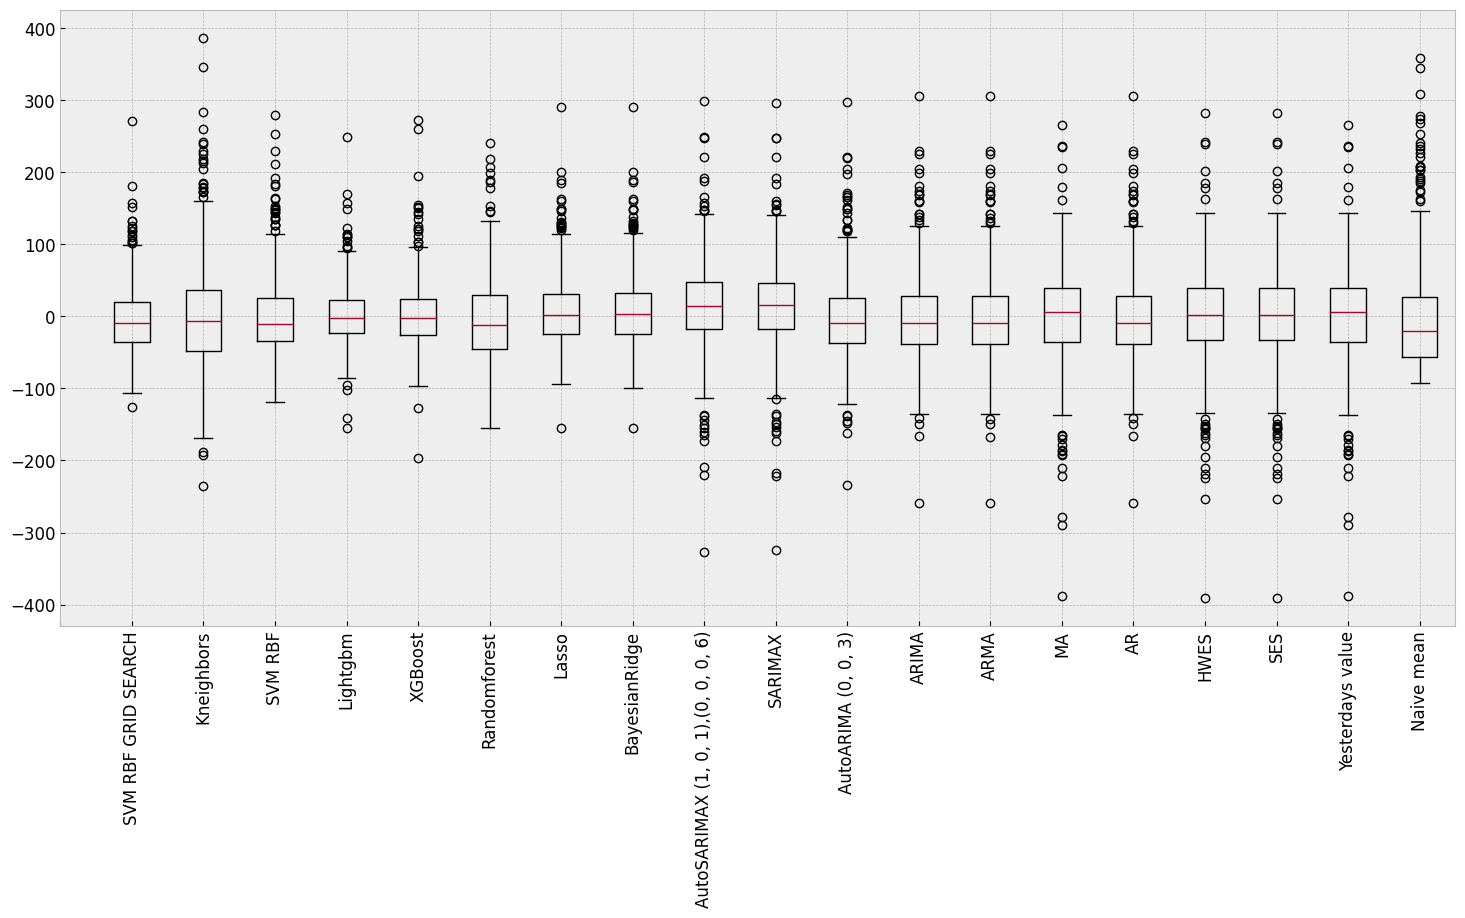

In [3]:
df_test = pd.read_csv("datasets/test.csv")
residuals = [df_test.pollution_today.values - predictionsDict[u]
             for u in predictionsDict.keys()]
residuals.reverse()
plt.boxplot(residuals)
ticks = list(predictionsDict.keys())
ticks.reverse()
ticks = [''] + ticks
rang = range(0, len(ticks))
plt.xticks(rang, ticks, rotation='vertical')
pass